In [187]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [139]:
df = pd.read_csv('Engineered.csv', dtype={'column29': str})  # Replace 'column29' with the actual column name

/var/folders/w8/h17mq4cj57xf632w6g0q6lv40000gn/T/ipykernel_51881/2712963885.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Engineered.csv', dtype={'column29': str})  # Replace 'column29' with the actual column name


In [140]:
df_embeddings = pd.read_csv('embeddings.csv') 
df_embeddings = df_embeddings.drop(columns=['flagged'])

In [141]:
# Merge DataFrames using 'reviewId'
merged_df = pd.merge(df, df_embeddings, on='reviewID', how='inner')
merged_df = merged_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0',])

In [188]:
merged_df

,reviewDate,reviewID,reviewerID,reviewContent,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,restaurantID,flagged,...,preprocessed,main_topic,Num_Char,Num_Punc,verb_count,adj_count,sentiment,polarity,subjectivity,embedding
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",5,0,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,"['unlike', 'next', 'wed', 'eaten', 'previous',...",33,4890,143,170,50,"Sentiment(polarity=0.13913951545530495, subjec...",1.391395e-01,0.528655,"[-0.23913899064064026, 0.1283329278230667, 0.0..."
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,5,0,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,"['probably', 'one', 'best', 'meal', 'ive', 'ev...",10,350,10,15,8,"Sentiment(polarity=0.4666666666666666, subject...",4.666667e-01,0.566667,"[0.10993178188800812, 0.10660126805305481, 0.0..."
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,3,2,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,"['service', 'impeccable', 'experience', 'prese...",18,257,9,14,5,"Sentiment(polarity=0.4133333333333334, subject...",4.133333e-01,0.720000,"[0.17507007718086243, 0.03029392473399639, 0.1..."
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",3,8,0,3,pbEiXam9YJL3neCYHGwLUA,0,...,"['problem', 'place', 'like', 'given', 'exhorbi...",33,2156,84,52,34,"Sentiment(polarity=0.12054824561403507, subjec...",1.205482e-01,0.535201,"[-0.07138868421316147, 0.185563325881958, 0.28..."
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,5,1,2,0,pbEiXam9YJL3neCYHGwLUA,0,...,"['idea', 'write', 'review', 'dining', 'alinea'...",33,951,29,27,20,"Sentiment(polarity=0.16746031746031745, subjec...",1.674603e-01,0.564683,"[0.048450715839862823, 0.22147926688194275, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,3/17/2010,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,"It's Taco Bell, with higher prices, but it's T...",4,0,0,1,v9qEDxi3t-P0CmGWAkkGvw,0,...,"['taco', 'bell', 'higher', 'price', 'taco', 'b...",29,512,16,23,6,"Sentiment(polarity=0.22662337662337664, subjec...",2.266234e-01,0.760173,"[0.06812692433595657, 0.012743202969431877, 0...."
26952,4/14/2011,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,Yellow Rose is a favorite of mine. I'd go ther...,5,0,0,0,RRflazDtBkqqpvEz2hbV2w,0,...,"['yellow', 'rose', 'favorite', 'mine', 'id', '...",34,522,17,17,9,"Sentiment(polarity=0.2692708333333333, subject...",2.692708e-01,0.608333,"[-0.19266746938228607, 0.0278228297829628, 0.2..."
26953,9/23/2007,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,Not bad. We ate there because the odd wicker s...,3,0,1,0,zI0E_yruu58ea-xq9aHi-w,0,...,"['bad', 'ate', 'odd', 'wicker', 'seat', 'invit...",10,209,8,6,5,"Sentiment(polarity=-0.119047619047619, subject...",-1.190476e-01,0.588095,"[0.09447625279426575, -0.1751326024532318, 0.0..."
26954,11/18/2011,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,We were surprised to have been eagerly roped i...,3,0,0,0,6XVXM78gBuU3gpq2hTOgJA,0,...,"['surprised', 'eagerly', 'roped', 'pop', 'triv...",21,347,12,15,5,"Sentiment(polarity=6.938893903907228e-18, subj...",6.938894e-18,0.658333,"[0.2742891013622284, -0.14054079353809357, 0.0..."


In [143]:
merged_df['embedding'] = merged_df['embedding'].apply(ast.literal_eval)

In [144]:
df = merged_df

In [145]:
embedding_columns = pd.DataFrame(df['embedding'].to_list(), columns=[f'embedding_{i}' for i in range(768)])

In [189]:
embedding_columns

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_758,embedding_759,embedding_760,embedding_761,embedding_762,embedding_763,embedding_764,embedding_765,embedding_766,embedding_767
0,-0.239139,0.128333,0.030601,0.188698,0.179459,0.091061,-0.013489,0.349440,0.190824,-0.026000,...,-0.346646,-0.020995,0.101202,-0.072782,-0.153681,-0.257142,0.065339,0.164680,0.216101,0.161352
1,0.109932,0.106601,0.095007,-0.043294,0.240122,-0.048100,0.235858,0.606272,0.096912,-0.276641,...,-0.100345,-0.135662,0.101436,-0.291421,-0.084117,-0.016055,0.055459,0.070562,0.110858,0.140647
2,0.175070,0.030294,0.133925,0.108557,0.292877,-0.096405,-0.071900,0.782692,0.073460,-0.149470,...,-0.032257,-0.195637,0.033009,-0.357601,-0.127898,-0.063501,0.012857,-0.089491,0.114655,0.255965
3,-0.071389,0.185563,0.280048,0.096304,0.254236,0.171664,0.051094,0.511341,0.178245,-0.277077,...,-0.271803,-0.148201,0.070824,-0.183742,-0.148627,-0.293858,0.068862,0.041990,0.148788,0.085762
4,0.048451,0.221479,0.149429,-0.006394,0.186022,-0.079410,0.028387,0.727596,0.088827,-0.280114,...,-0.175488,-0.155962,0.075905,-0.204652,-0.126759,-0.059733,0.045032,-0.027244,0.179802,0.089827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,0.068127,0.012743,0.339342,-0.024393,0.112681,0.187621,0.005480,0.870051,0.004058,-0.167426,...,-0.401634,-0.149763,0.002567,-0.311448,-0.164592,0.033955,-0.034833,0.039568,0.168914,0.158517
26952,-0.192667,0.027823,0.219797,0.000205,0.399626,0.012694,-0.031470,1.019443,-0.034459,-0.235981,...,-0.347059,-0.306652,0.156991,-0.146208,0.024675,-0.112160,-0.142495,0.118314,0.157822,0.019326
26953,0.094476,-0.175133,0.079992,0.209250,0.222569,0.062975,0.074100,1.156222,0.150471,-0.301066,...,-0.409674,-0.142150,-0.110172,-0.229304,-0.148320,0.120911,-0.039800,0.115554,0.230058,-0.102864
26954,0.274289,-0.140541,0.086393,0.033212,0.184598,0.000361,-0.144868,0.796511,0.154168,-0.105821,...,-0.453053,-0.271859,-0.082150,-0.113309,-0.088408,-0.125548,0.043753,0.098892,0.252293,0.047042


In [190]:
# Select features and target variable
selected_columns = ['reviewerID','reviewRating','resRating', 'DATE_TIME_count',
                    'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count', 'PERSON_count', 'PHONE_NUMBER_count',
                    'DATE_TIME_flag', 'EMAIL_ADDRESS_flag', 'LOCATION_flag', 'PERSON_flag',
                    'PHONE_NUMBER_flag', 'date_diff_joinedandreviewed', 'main_topic', 'Num_Char', 'Num_Punc',
                    'verb_count', 'adj_count', 'polarity', 'subjectivity']

# selected_columns = ['reviewerID','reviewRating', 'reviewUsefulCount', 'reviewCoolCount', 'reviewFunnyCount',
#                     'reviewerFriendCount', 'reviewerNumReviews', 'reviewerFirstCount', 'reviewerUsefulCount',
#                     'reviewerCoolCount', 'reviewerFunnyCount', 'reviewerComplimentCount', 'reviewerTipCount',
#                     'reviewerFanCount', 'resReviewCount', 'resRating', 'DATE_TIME_count',
#                     'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count', 'PERSON_count', 'PHONE_NUMBER_count',
#                     'DATE_TIME_flag', 'EMAIL_ADDRESS_flag', 'LOCATION_flag', 'PERSON_flag',
#                     'PHONE_NUMBER_flag', 'date_diff_joinedandreviewed', 'main_topic', 'Num_Char', 'Num_Punc',
#                     'verb_count', 'adj_count', 'polarity', 'subjectivity']

X = df[selected_columns]
X = pd.concat([X, embedding_columns], axis=1)
y = df['flagged']  # Replace 'your_target_variable' with the actual target variable name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
split = splitter.split(X, groups=X['reviewerID'])
train_inds, test_inds = next(split)

X_train = X.iloc[train_inds]
X_test = X.iloc[test_inds]
y_train = y.iloc[train_inds]
y_test = y.iloc[test_inds]

In [192]:
# Check for common 'reviewID' values between train and test sets
common_review_ids = set(X_train['reviewerID']) & set(X_test['reviewerID'])

# Ensure there are no common 'reviewID' values
if len(common_review_ids) == 0:
    print("No common 'reviewerID' values between train and test sets. Data split is good.")
else:
    print("Data leakage issue: There are common 'reviewerID' values between train and test sets.")

No common 'reviewerID' values between train and test sets. Data split is good.


In [193]:
X_train = X_train.drop(columns=['reviewerID'])
X_test = X_test.drop(columns=['reviewerID'])
y_train = y_train.drop(columns=['reviewerID'])
y_test = y_test.drop(columns=['reviewerID'])

In [196]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification, adjust activation accordingly
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])  # For binary classification

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/100
672/672 [==============================] - 1s 1ms/step - loss: 0.4787 - recall: 0.2205 - val_loss: 0.4315 - val_recall: 0.2765
Epoch 2/100
672/672 [==============================] - 1s 1ms/step - loss: 0.4182 - recall: 0.3613 - val_loss: 0.4250 - val_recall: 0.3634
Epoch 3/100
672/672 [==============================] - 1s 1ms/step - loss: 0.3859 - recall: 0.4484 - val_loss: 0.4297 - val_recall: 0.4336
Epoch 4/100
672/672 [==============================] - 1s 1ms/step - loss: 0.3563 - recall: 0.5145 - val_loss: 0.4741 - val_recall: 0.5698
Epoch 5/100
672/672 [==============================] - 1s 1ms/step - loss: 0.3339 - recall: 0.5678 - val_loss: 0.4600 - val_recall: 0.4127
Epoch 6/100
672/672 [==============================] - 1s 1ms/step - loss: 0.2981 - recall: 0.6305 - val_loss: 0.4815 - val_recall: 0.4670
Epoch 7/100
672/672 [==============================] - 1s 1ms/step - loss: 0.2683 - recall: 0.6874 - val_loss: 0.5005 - val_recall: 0.4269
Epoch 8/100
672/672 [======

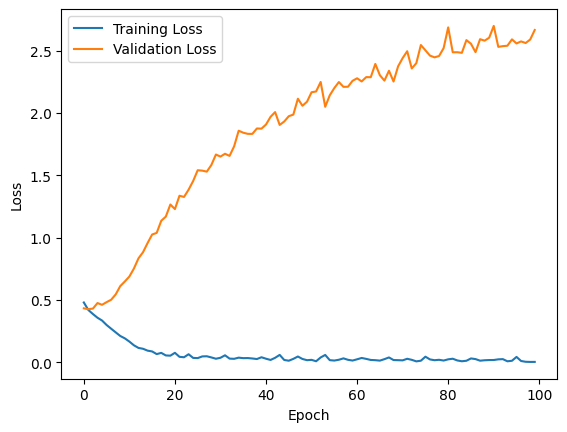

In [197]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [199]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification, adjust activation accordingly
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])  # For binary classification

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test))
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/20
336/336 [==============================] - 1s 2ms/step - loss: 0.4794 - recall: 0.2213 - val_loss: 0.4408 - val_recall: 0.2740
Epoch 2/20
336/336 [==============================] - 0s 1ms/step - loss: 0.4132 - recall: 0.3727 - val_loss: 0.4279 - val_recall: 0.2899
Epoch 3/20
336/336 [==============================] - 0s 1ms/step - loss: 0.3811 - recall: 0.4530 - val_loss: 0.4418 - val_recall: 0.4269
Epoch 4/20
336/336 [==============================] - 0s 1ms/step - loss: 0.3507 - recall: 0.5279 - val_loss: 0.4373 - val_recall: 0.4461
Epoch 5/20
336/336 [==============================] - 0s 1ms/step - loss: 0.3228 - recall: 0.5856 - val_loss: 0.4541 - val_recall: 0.3500
Epoch 6/20
336/336 [==============================] - 0s 1ms/step - loss: 0.2926 - recall: 0.6359 - val_loss: 0.4750 - val_recall: 0.3835
Epoch 7/20
336/336 [==============================] - 0s 1ms/step - loss: 0.2666 - recall: 0.6810 - val_loss: 0.5010 - val_recall: 0.3885
Epoch 8/20
336/336 [==============

In [218]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming 'model' is your trained TensorFlow model and 'X_test_scaled' is your scaled test set
y_pred = model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.09).astype(int)  # Adjust threshold as needed

# Convert y_test to binary (if it's not already)
y_test_binary = (y_test > 0.09).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test_binary, y_pred_binary)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test_binary, y_pred_binary)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test_binary, y_pred_binary)
print(f"F1-Score: {f1}")


172/172 [==============================] - 0s 1ms/step
Confusion Matrix:
[[3355  930]
 [ 521  676]]
Accuracy: 0.7353155782561109
Precision: 0.42092154420921546
Recall: 0.5647451963241437
F1-Score: 0.48234034962540134


In [213]:
y_pred

array([[3.7919605e-09],
       [2.7141507e-09],
       [1.8572667e-12],
       ...,
       [3.8643602e-02],
       [1.9841097e-01],
       [1.1650601e-04]], dtype=float32)

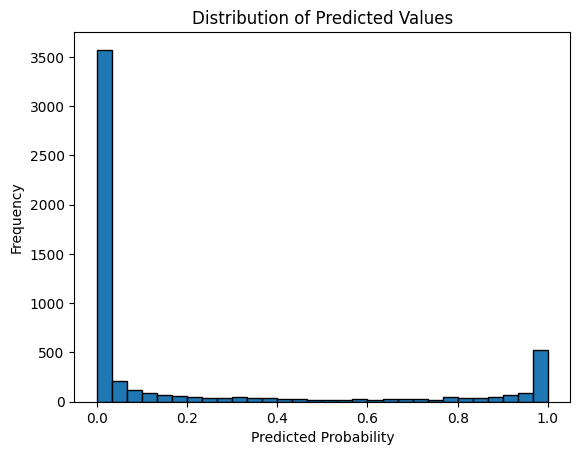

In [214]:
plt.hist(y_pred, bins=30, edgecolor='black')
plt.title('Distribution of Predicted Values')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()
